<a href="https://colab.research.google.com/github/melissanespeque/jsdatascience/blob/main/commbanktwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk textblob wordcloud matplotlib seaborn


In [ ]:
import requests
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords


In [ ]:
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAK2lzQEAAAAA6Ya13sGg4IPLnF1v9PH0pL9ZeC8%3DkCmQJefzireiZ5OMFTYsclMpqbQGVde099aI89qxUqvUMtzGcP"
API_KEY = "178768286-bFRR3TVivQKO52pioGlwc07d7V1efNbchb1iy4A9"
API_KEY_SECRET = "HUPj3yRhI8nYfGbcmdZxmtdopCw973JN6UtxgK13uZ9Jm"

In [ ]:
print(BEARER_TOKEN)

AAAAAAAAAAAAAAAAAAAAAK2lzQEAAAAA6Ya13sGg4IPLnF1v9PH0pL9ZeC8%3DkCmQJefzireiZ5OMFTYsclMpqbQGVde099aI89qxUqvUMtzGcP


In [ ]:
handle = "CommBank"
url = f"https://api.twitter.com/2/tweets/search/recent?query=from:{handle}&max_results=100"

headers = {"Authorization": f"Bearer {BEARER_TOKEN}"}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    tweets = response.json()
    print(tweets)
else:
    print(f"Erro: {response.status_code}, {response.text}")

Erro: 429, {"account_id":1892384879645487104,"product_name":"standard-basic","title":"UsageCapExceeded","period":"Monthly","scope":"Product","detail":"Usage cap exceeded: Monthly product cap","type":"https://api.twitter.com/2/problems/usage-capped"}


In [ ]:
# Criando um dicionário formatado corretamente
tweets_dict = [
    {
        "id": tweet["id"],  # Não precisa converter para int, pois IDs do Twitter são strings numéricas
        "text": tweet["text"],
    }
    for tweet in tweets.get("data", [])  # Evita erro se "data" não existir
]

# Exemplo de saída:
display(tweets_dict)


[{'id': '1893390665784139870',
  'text': "@badhammy1 I'm sorry for the inconvenience that has caused you this morning. And yes, it can take between 2 to 3 business days for the transfer to be received."},
 {'id': '1893389250315591839',
  'text': '@badhammy1 Hi there, we are aware some customers are experiencing issues, and our teams are working to have this resolved as soon as possible. ^Bea'},
 {'id': '1893207525706867038',
  'text': "@barbwodecki Hi there, I understand your concern and I'm keen to help. Please feel free to send a DM. ^Carla"},
 {'id': '1893133467992629752',
  'text': '@georgedeighton5 Hey Dates, Please send us a DM with your details. Happy to connect you to the team. ^Jem'},
 {'id': '1892400234573287510',
  'text': '@chadscalper if you would like me to lodge a complaint for you so your comments can be reported back the relevant management, and they know how you have been affected feel free to reach out on a DM. ^Nat'},
 {'id': '1892395159234715664',
  'text': '@Sarah

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#função para remover noise dos tweets
def clean_tweet(text):
    text = re.sub(r'@\w+', '', text)  # Remove menções (@usuario)
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove caracteres especiais e números (regex)
    text = text.lower()  # Converte para minúsculas
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Aplicar a função de limpeza aos tweets
tweets_cleaned = [clean_tweet(tweet['text']) for tweet in tweets_dict]

# Exibir os tweets limpos
display(tweets_cleaned)

['im sorry inconvenience caused morning yes take business days transfer received',
 'hi aware customers experiencing issues teams working resolved soon possible bea',
 'hi understand concern im keen help please feel free send dm carla',
 'hey dates please send us dm details happy connect team jem',
 'would like lodge complaint comments reported back relevant management know affected feel free reach dm nat',
 'would like lodge complaint comments reported back relevant management know affected feel free reach dm nat',
 'see come post earlier week replied nat',
 'would like reference complaint feel free reach dm nat',
 'would like lodge complaint comments reported back relevant management know affected feel free reach dm nat',
 'hi tehre vu lending specialists always open conversation need talk requirements please speak us branch call us pm monday friday pm saturday sydneymelbourne time nat',
 'hi vu appreciate everyone wants competitive rate parents would like discuss home loan options b

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Retorna um valor entre -1 e 1

tweets_sentiment = [{"tweet": tweet, "sentiment": get_sentiment(tweet)} for tweet in tweets_cleaned]

# Classificar tweets
for t in tweets_sentiment:
    if t["sentiment"] > 0:
        t["label"] = "Positivo"
    elif t["sentiment"] < 0:
        t["label"] = "Negativo"
    else:
        t["label"] = "Neutro"


In [ ]:
print(tweets_sentiment)

[{'tweet': 'im sorry inconvenience caused morning yes take business days transfer received', 'sentiment': -0.5, 'label': 'Negativo'}, {'tweet': 'hi aware customers experiencing issues teams working resolved soon possible bea', 'sentiment': 0.125, 'label': 'Positivo'}, {'tweet': 'hi understand concern im keen help please feel free send dm carla', 'sentiment': 0.4, 'label': 'Positivo'}, {'tweet': 'hey dates please send us dm details happy connect team jem', 'sentiment': 0.8, 'label': 'Positivo'}, {'tweet': 'would like lodge complaint comments reported back relevant management know affected feel free reach dm nat', 'sentiment': 0.125, 'label': 'Positivo'}, {'tweet': 'would like lodge complaint comments reported back relevant management know affected feel free reach dm nat', 'sentiment': 0.125, 'label': 'Positivo'}, {'tweet': 'see come post earlier week replied nat', 'sentiment': 0.0, 'label': 'Neutro'}, {'tweet': 'would like reference complaint feel free reach dm nat', 'sentiment': 0.0500

<ipython-input-30-4162a1edd614>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="coolwarm")


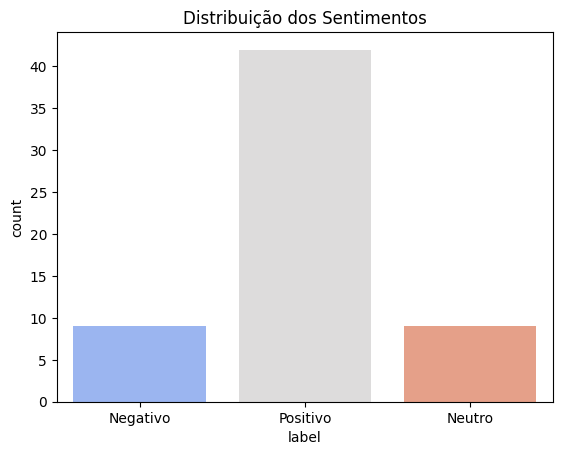

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar um DataFrame
import pandas as pd
df = pd.DataFrame(tweets_sentiment)

# Contar os tipos de sentimento
sns.countplot(x="label", data=df, palette="coolwarm")
plt.title("Distribuição dos Sentimentos")
plt.show()


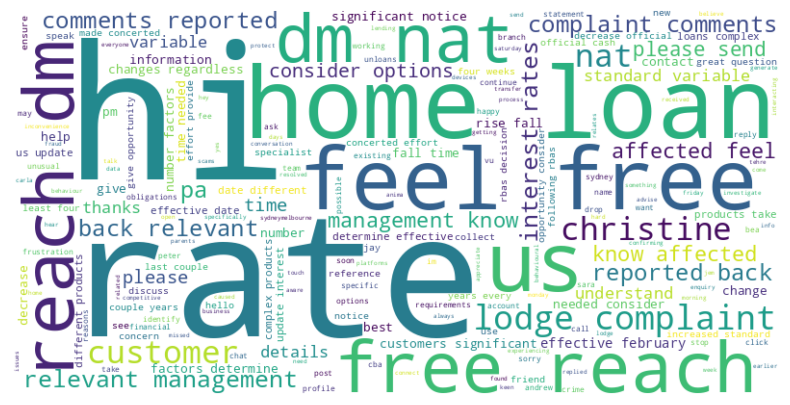

In [ ]:
from wordcloud import WordCloud

text = " ".join(tweet["tweet"] for tweet in tweets_sentiment)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()
tweets_sentiment = [
    {
        "text": tweet,
        "sentiment": sia.polarity_scores(tweet)  # Aplica a análise de sentimento
    }
    for tweet in tweets_cleaned  # Usa a lista de tweets limpos
]


In [ ]:
for tweet in tweets_sentiment[:5]:  # Mostra os 5 primeiros tweets analisados
    print(tweet)


{'text': 'im sorry inconvenience caused morning yes take business days transfer received', 'sentiment': {'neg': 0.262, 'neu': 0.552, 'pos': 0.186, 'compound': -0.0258}}
{'text': 'hi aware customers experiencing issues teams working resolved soon possible bea', 'sentiment': {'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.1779}}
{'text': 'hi understand concern im keen help please feel free send dm carla', 'sentiment': {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.8689}}
{'text': 'hey dates please send us dm details happy connect team jem', 'sentiment': {'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.7184}}
{'text': 'would like lodge complaint comments reported back relevant management know affected feel free reach dm nat', 'sentiment': {'neg': 0.175, 'neu': 0.507, 'pos': 0.318, 'compound': 0.4767}}


In [ ]:
def classify_sentiment(score):
    if score >= 0.05:
        return "positivo"
    elif score <= -0.05:
        return "negativo"
    else:
        return "neutro"

# Adiciona a classificação em cada tweet
for tweet in tweets_sentiment:
    tweet["label"] = classify_sentiment(tweet["sentiment"]["compound"])

# Exibe os resultados
for tweet in tweets_sentiment[:5]:  # Mostra os 5 primeiros tweets analisados
    print(tweet)


{'text': 'im sorry inconvenience caused morning yes take business days transfer received', 'sentiment': {'neg': 0.262, 'neu': 0.552, 'pos': 0.186, 'compound': -0.0258}, 'label': 'neutro'}
{'text': 'hi aware customers experiencing issues teams working resolved soon possible bea', 'sentiment': {'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.1779}, 'label': 'positivo'}
{'text': 'hi understand concern im keen help please feel free send dm carla', 'sentiment': {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.8689}, 'label': 'positivo'}
{'text': 'hey dates please send us dm details happy connect team jem', 'sentiment': {'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.7184}, 'label': 'positivo'}
{'text': 'would like lodge complaint comments reported back relevant management know affected feel free reach dm nat', 'sentiment': {'neg': 0.175, 'neu': 0.507, 'pos': 0.318, 'compound': 0.4767}, 'label': 'positivo'}


In [ ]:
labels = [tweet["label"] for tweet in tweets_sentiment]
sentiment_counts = Counter(labels)
df_sentiment = pd.DataFrame(sentiment_counts.items(), columns=["Sentimento", "Quantidade"])

<ipython-input-39-776e31d6af5c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


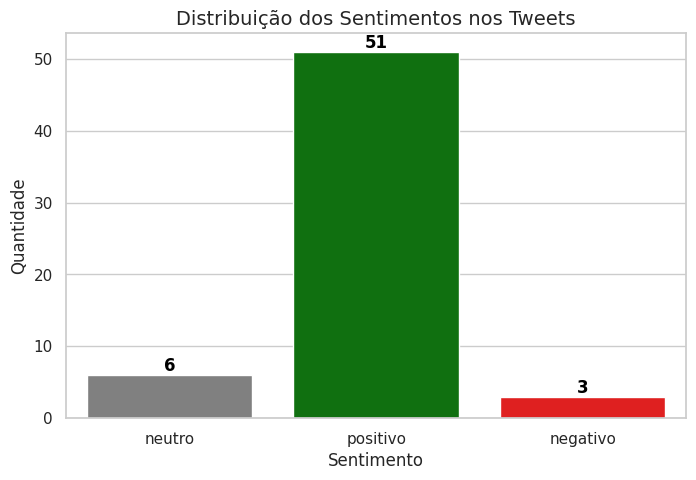

In [ ]:
# Criar o gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))

ax = sns.barplot(
    x="Sentimento",
    y="Quantidade",
    data=df_sentiment,
    palette={"positivo": "green", "neutro": "gray", "negativo": "red"}
)

# Adicionar rótulos com valores em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Valor a ser exibido
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='bottom',  # Alinhamento
                fontsize=12, fontweight="bold", color="black")  # Estilização

# Títulos e rótulos
plt.title("Distribuição dos Sentimentos nos Tweets", fontsize=14)
plt.xlabel("Sentimento", fontsize=12)
plt.ylabel("Quantidade", fontsize=12)

plt.show()
